In [41]:
#id pers
# ==========================================================
# JAFFE + PCA + SVM - Interactive Test
# ==========================================================
import os
import cv2
import numpy as np
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

# 1️⃣ Define data directory
data_dir = "../data"  # adjust if needed
images = [f for f in os.listdir(data_dir) if f.endswith(".tiff")]

# 2️⃣ Load images and labels
X = []
y = []
for f in images:
    img = cv2.imread(os.path.join(data_dir, f), cv2.IMREAD_GRAYSCALE)
    X.append(img.flatten())
    label = f.split(".")[0]  # person ID
    y.append(label)

X = np.array(X)
y = np.array(y)

# 3️⃣ Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4️⃣ PCA
pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# 5️⃣ Train SVM
svm = SVC(kernel='rbf', C=10, gamma='scale')
svm.fit(X_train_pca, y_train)

# 6️⃣ Evaluate on test set
y_pred = svm.predict(X_test_pca)
print("Test accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# 7️⃣ Interactive dropdown to test any image
def test_image(index):
    clear_output(wait=True)
    img_path = os.path.join(data_dir, images[index])
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img_flat = img.flatten().reshape(1, -1)
    img_pca = pca.transform(img_flat)
    predicted_label = svm.predict(img_pca)[0]
    
    print("Testing image:", images[index])
    print("Predicted person ID:", predicted_label)
    
    plt.imshow(img, cmap="gray")
    plt.title(f"Predicted: {predicted_label}")
    plt.axis("off")
    plt.show()

# Create dropdown
dropdown = widgets.Dropdown(
    options=[(images[i], i) for i in range(len(images))],
    description='Choose Image:',
    layout=widgets.Layout(width='400px')
)
widgets.interact(test_image, index=dropdown)


Test accuracy: 0.9767441860465116
              precision    recall  f1-score   support

          KA       0.83      1.00      0.91         5
          KL       1.00      1.00      1.00         4
          KM       1.00      1.00      1.00         5
          KR       1.00      0.75      0.86         4
          MK       1.00      1.00      1.00         4
          NA       1.00      1.00      1.00         4
          NM       1.00      1.00      1.00         4
          TM       1.00      1.00      1.00         4
          UY       1.00      1.00      1.00         4
          YM       1.00      1.00      1.00         5

    accuracy                           0.98        43
   macro avg       0.98      0.97      0.98        43
weighted avg       0.98      0.98      0.98        43



interactive(children=(Dropdown(description='Choose Image:', layout=Layout(width='400px'), options=(('KA.AN1.39…

<function __main__.test_image(index)>

In [42]:
##### ceva nou test img id pers
# ==========================================================
# JAFFE + PCA + SVM - Robust Interactive Test
# ==========================================================
import os
import cv2
import numpy as np
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

# 1️⃣ Define data directory
data_dir = "../data"  # adjust if needed
images = [f for f in os.listdir(data_dir) if f.endswith(".tiff")]

# 2️⃣ Load images and labels
X = []
y = []

for f in images:
    img = cv2.imread(os.path.join(data_dir, f), cv2.IMREAD_GRAYSCALE)
    X.append(img.flatten())
    label = f.split(".")[0]  # person ID
    y.append(label)

# Store original training image shape for resizing test images
train_img_shape = img.shape  # e.g., (80, 80)

X = np.array(X)
y = np.array(y)

# 3️⃣ Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)

# 4️⃣ PCA
pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# 5️⃣ Train SVM
svm = SVC(kernel='rbf', C=10, gamma='scale')
svm.fit(X_train_pca, y_train)

# 6️⃣ Evaluate on test set
y_pred = svm.predict(X_test_pca)
print("Test accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# 7️⃣ Robust interactive test
def test_image(index):
    clear_output(wait=True)
    img_path = os.path.join(data_dir, images[index])
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    
    # Resize to match training images
    img_resized = cv2.resize(img, (train_img_shape[1], train_img_shape[0]))
    
    img_flat = img_resized.flatten().reshape(1, -1)
    img_pca = pca.transform(img_flat)
    predicted_label = svm.predict(img_pca)[0]
    
    print("Testing image:", images[index])
    print("Predicted person ID:", predicted_label)
    
    plt.imshow(img_resized, cmap="gray")
    plt.title(f"Predicted: {predicted_label}")
    plt.axis("off")
    plt.show()

# Create dropdown
dropdown = widgets.Dropdown(
    options=[(images[i], i) for i in range(len(images))],
    description='Choose Image:',
    layout=widgets.Layout(width='400px')
)
widgets.interact(test_image, index=dropdown)


Test accuracy: 0.9883720930232558
              precision    recall  f1-score   support

          KA       0.90      1.00      0.95         9
          KL       1.00      1.00      1.00         9
          KM       1.00      1.00      1.00         9
          KR       1.00      0.88      0.93         8
          MK       1.00      1.00      1.00         9
          NA       1.00      1.00      1.00         8
          NM       1.00      1.00      1.00         8
          TM       1.00      1.00      1.00         8
          UY       1.00      1.00      1.00         9
          YM       1.00      1.00      1.00         9

    accuracy                           0.99        86
   macro avg       0.99      0.99      0.99        86
weighted avg       0.99      0.99      0.99        86



interactive(children=(Dropdown(description='Choose Image:', layout=Layout(width='400px'), options=(('KA.AN1.39…

<function __main__.test_image(index)>

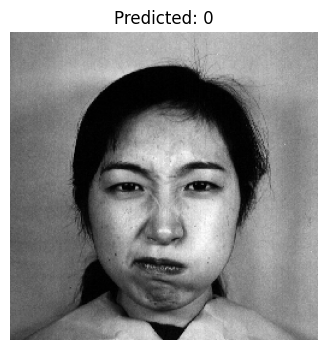

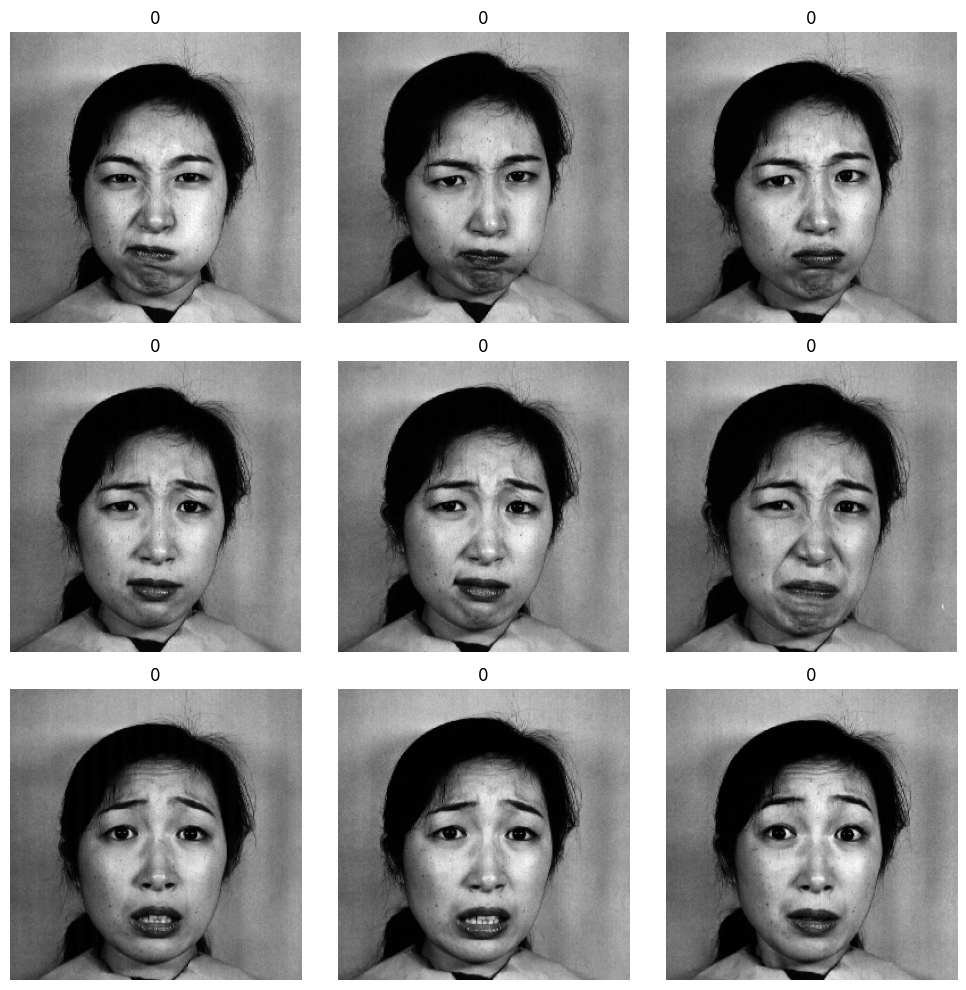

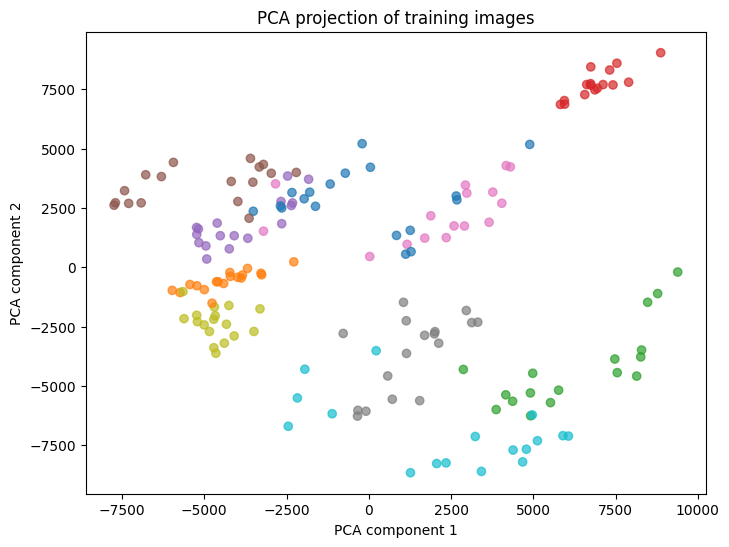

In [14]:
#id pers
import matplotlib.pyplot as plt

# 1️⃣ Show a single test image with predicted label
index = 0  # Change index to any test image
img = cv2.imread(os.path.join(data_dir, images[index]), cv2.IMREAD_GRAYSCALE)
img_flat = img.flatten().reshape(1, -1)
img_pca = pca.transform(img_flat)
predicted_label = svm.predict(img_pca)[0]

plt.figure(figsize=(4,4))
plt.imshow(img, cmap='gray')
plt.title(f"Predicted: {predicted_label}")
plt.axis('off')
plt.show()


# 2️⃣ Plot multiple test images with predictions
num_samples = 9  # number of images to show
plt.figure(figsize=(10,10))

for i in range(num_samples):
    img = cv2.imread(os.path.join(data_dir, images[i]), cv2.IMREAD_GRAYSCALE)
    img_flat = img.flatten().reshape(1, -1)
    img_pca = pca.transform(img_flat)
    predicted_label = svm.predict(img_pca)[0]

    plt.subplot(3, 3, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(predicted_label)
    plt.axis('off')

plt.tight_layout()
plt.show()


# 3️⃣ Optional: visualize PCA components of test set in 2D
if X_train_pca.shape[1] >= 2:  # need at least 2 components
    plt.figure(figsize=(8,6))
    plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=[hash(l)%10 for l in y_train], cmap='tab10', alpha=0.7)
    plt.xlabel('PCA component 1')
    plt.ylabel('PCA component 2')
    plt.title('PCA projection of training images')
    plt.show()


In [45]:
# ==========================================================
# Interactive dropdown to test images
# ==========================================================
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import clear_output

def test_image(index):
    clear_output(wait=True)
    img_path = os.path.join(data_dir, images[index])
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img_flat = img.flatten().reshape(1, -1)
    img_pca = pca.transform(img_flat)
    predicted_emotion = svm.predict(img_pca)[0]
    
    print("Testing image:", images[index])
    print("Predicted emotion:", predicted_emotion)
    
    plt.imshow(img, cmap="gray")
    plt.title(f"Predicted: {predicted_emotion}")
    plt.axis("off")
    plt.show()

dropdown = widgets.Dropdown(
    options=[(images[i], i) for i in range(len(images))],
    description='Choose Image:',
    layout=widgets.Layout(width='400px')
)
widgets.interact(test_image, index=dropdown)


interactive(children=(Dropdown(description='Choose Image:', layout=Layout(width='400px'), options=(('KA.AN1.39…

<function __main__.test_image(index)>